## Instructor 

In [ ]:
#to generate the image without running pltshow()

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Linear Regression

Linear Regression is a fundamental algorithm in machine learning.

It is used as a building block for other ML models.

LR is easy to understand, calculate, and interpret.

LR is fast!

Ofen good enough. Don't over-engineer your solution. If your data is linear, then use a linear model.

In [ ]:
from sklearn.datasets import make_regression
 
#random_state, to reproduce the same analyssi with the coefficients or dataset changing
x, y = make_regression(n_samples=20, n_features=1, random_state=0, noise=4, bias=100 )

In [ ]:
plt.scatter(x,y)

The response or output is directly proportional to the input
We can see from the data that we have a linear trend in our model. (The response or output is directly proportional to the input)
We can use Linear Regression to fit a line through the data.

Sklearn Model

1. import
2. instantiate
3. fit
4. predit

In [ ]:
#import
from sklearn.linear_model import LinearRegression

#instantiate
model = LinearRegression()

In [ ]:
model

In [ ]:
#fit the model
model.fit(x,y)

In [ ]:
print('weight coeffiecients:', model.coef_)
print('y-axis intercept:', model.intercept_)

the linear model now looks like:

    y = 101.89 + 12.44x

In [ ]:
predictions = model.predict(x)

In [ ]:
predictions

In [ ]:
pd.DataFrame({'Predicted':predictions, 'Actual':y, 'Error' :predictions-y})[['Predicted','Actual','Error']]

In [ ]:
# now using the predict function to calculate predicted values

print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

In [ ]:
x_min = x.min()
x_max = x.max()

y_min_actual = y.min()
y_max_actual = y.max()

In [ ]:
y_min = model.intercept_ + model.coef_ * x_min
y_max = model.intercept_ + model.coef_ * x_max

print(f'Actual Min Value: {y_min_actual}')
print(f'Calculated Min Value: {y_min}')
print(f'Actual Max Value: {y_max_actual}')
print(f'Calculated Max Value: {y_max}')

In [ ]:
plt.scatter(x,y, c='darkred')
plt.plot([x_min, x_max],[y_min, y_max], c='black')

## LSD - Student

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
lsd = pd.read_csv('resources/lsd.csv')
lsd.head()

In [ ]:
visualize = lsd['tc'].values
visualize

In [ ]:
#visualize the one dimensional array

visualize = lsd.tc.values
visualize

In [ ]:
print('shape: ', visualize.shape)

In [ ]:
#notice the two dimensional array

lsd.tc.values.reshape(-1,1)

In [ ]:
#assign the data to an x and y

x = lsd.tc.values.reshape(-1,1)
y = lsd.score.values.reshape(-1,1)

#Note: Sklearn requires a 7 x 1 array of values
print('shape: ', x.shape, y.shape)


In [ ]:
#plot the data

plt.scatter(x,y, c = 'k')

In [ ]:
from sklearn.linear_model import LinearRegression

#instantiate the model
model = LinearRegression()

#Note: This is the training step where you fit the line to the data.
model.fit(x,y)

In [ ]:
print('Weight coefficients: ', model.coef_)
print('y-axis interceptt: ', model.intercept_)

In [ ]:
#Note: we have to transform our min and max values into the format, arrawy([[1.17]])
x.min()

In [ ]:
x_min = np.array([[x.min()]])
x_max = np.array([[x.max()]])

print(f'min y value: {y_min}')
print(f'min x value: {x_min}')

In [ ]:
#the alternative to finding y_min and y_max

y_min = model.coef_ * x_min + model.intercept_
y_max = model.coef_ * x_max + model.intercept_

print(f'manual :: max x value: {x_max}')
print(f'manual :: max y value: {y_max}')

In [ ]:
#calculate the y_min and y_max using model.predict and x_min and x_max
y_min = model.predict(x_min)
y_max = model.predict(x_max)

print(f'max x value: {x_max}')
print(f'max y value: {y_max}')

In [ ]:
plt.scatter(x,y,c='0.55')

plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='0.55')

### Revisting LSD


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [ ]:
dataset = pd.read_csv('resources/LSD.csv')
dataset.tail()

In [ ]:
dataset.tc.values

In [ ]:
tc = dataset.tc.values.reshape(-1,1)
tc.shape

In [ ]:
score = dataset.score.values.reshape(-1,1)
score.shape

In [ ]:
plt.scatter(tc, score, c='0.75')

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [ ]:
model.fit(tc, score)

In [ ]:
print(f'coefficient {model.coef_}')
print(f'y-intercept {model.intercept_}')

### Visualize the Linear Model

y = -9.00x + 89.12

In [ ]:
tc_min = tc.min().reshape(-1,1)
tc_max = tc.max().reshape(-1,1)


print(tc_min)
print(tc_max)
print('')
print(tc_min.shape)
print(tc_max.shape)

In [ ]:
score_min = model.predict(tc_min)
score_max = model.predict(tc_max)

print(score_min)
print(score_max)

In [ ]:
ymin = model.coef_*tc_min + model.intercept_
ymin

ymax = model.coef_*tc_max + model.intercept_
ymax

In [ ]:
plt.scatter(tc,score, c='0.75')
plt.plot([tc_min[0], tc_max[0]],[score_min[0], score_max[0]], c='0.75')

---

## Quantifying Linear Regression

In [ ]:
#import dependencies

#create sample dataset
%matplotlib inline
import matplotlib.pyplot

from sklearn.datasets import make_regression

#import the model
from sklearn.linear_model import LinearRegression

In [ ]:
xaxis, yaxis = make_regression(n_samples=20, n_features=1, random_state=0, noise=4, bias=100)

plt.scatter(xaxis,yaxis, c='0.75')

In [ ]:
model = LinearRegression()

model.fit(xaxis,yaxis)

#### Quantifying the Model
 - Mean Squared Error(MSE)
 - R2 Score
 
There are a variety of ways to quantify the model, but MSE and R2 are very common

- MSE does not have an uppur bound, but we want it as close to it as 0. Looking at predicted and actual values and comparing

- R2 is betwee 0 and 1. How of explained variance. (ie 30% well my model is explaining 30% of variation in yaxis)

A 'good' MSE score will be close to zero while a 'good' R2 Score will be close to 1.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

#use our model to predict
predicted = model.predict(xaxis)

#score the prediction, we need the actual and the predicted
mse = mean_squared_error(yaxis, predicted)
r2 = r2_score(yaxis, predicted)

print(f'predicted x-value: {predicted}')
print('')
print(f'mean squared error (mse): {mse} || near zero, therefore good')
print(f'r-squared (r2): {r2} || I can describe 90% of the variation in y')


#### R2 Score is the default scoring for many of the SKlearn models

In [ ]:
#overall score for the model
model.score(xaxis, yaxis)

## Validation

We also want to understand how well our model performs on new data.

One approach for this is to split your data into a training and testing dataset.

You fit(train) the model using training data, and score and validate your model using the testing data.

This train/test splitting is so common that SKlearn provides a mechanism for doing this.

#### Testing and Training Data

In order to quantify our model agaisnt new input values, we often split the data into training and testing data. The model is then fit to the training data and scored by the test data. Sklearn pre-processing provides a library for automatically splitting up the data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split

#the default value of values that are used to train the model is 25% : test_size=0.25

x_train, x_test, y_train, y_test = train_test_split(xaxis, yaxis, random_state=42)

In [ ]:
#we are training our model using the training set

model.fit(x_train, y_train)

In [ ]:
# we score the model using the unseen testing data

model.score(x_test, y_test)

---


## Intelligence - Student

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split


In [ ]:
intelligence_file = pd.read_csv('Resources/brain.csv')
intelligence_file.tail()

In [ ]:
size = intelligence_file['size'].values.reshape(-1,1)
weight = intelligence_file['weight'].values.reshape(-1,1)

print('shape: ', size.shape, weight.shape)

plt.scatter(weight,size,c='0.75')
plt.xlabel('brain weight')
plt.ylabel('head size')


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(weight,size)

In [ ]:
sizeMin = size.min()
sizeMax = size.max()

print(sizeMin)
print(sizeMax)

weightMin = model.predict(sizeMin.reshape(-1,1))
weightMax = model.predict(sizeMax.reshape(-1,1))

print(weightMin)
print(weightMax)

In [ ]:
plt.scatter(size,weight)
plt.plot([sizeMin, sizeMax], [weightMin[0], weightMax[0]],c='0')

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

#use sklearn's 'train_test_split' to split the data into training and testing

from sklearn.model_selection import train_test_split


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(weight,size,random_state=42)

model.fit(xtrain,ytrain)

model.score(xtest,ytest)



### revisit intelligence

In [ ]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression

%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
iq = pd.read_csv('Resources/brain.csv')

iq.tail()

In [ ]:
weight_x = iq.weight.values.reshape(-1,1) 
size_y = iq['size'].values.reshape(-1,1)

In [ ]:
model = LinearRegression()

model.fit(weight_x,size_y)

In [ ]:
xmin = weight_x.min()
xmax = weight_x.max()

ymin = model.predict(xmin.reshape(-1,1))
ymax = model.predict(xmax.reshape(-1,1))

In [ ]:
plt.scatter(weight_x,size_y,c='0.75')
plt.plot([xmin,xmax],[ymin[0],ymax[0]],c='0.00')
plt.xlabel('weight')
plt.ylabel('size')

In [ ]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(weight_x,size_y,random_state=42)

#using the training variables, we want to create a model
model.fit(xtrain,ytrain)

model.score(xtest,ytest)

In [ ]:
xtest_min = xtest.min()
xtest_max = xtest.max()

ytest_min = model.predict(xtest_min.reshape(-1,1))
ytest_max = model.predict(xtest_max.reshape(-1,1))

In [ ]:
plt.scatter(weight_x,size_y,c='0.75')
plt.plot([xmin,xmax],[ymin[0],ymax[0]],c='0.00')
plt.plot([xtest_min,xtest_max],[ytest_min[0],ytest_max[0]],c='maroon')

plt.xlabel('weight')
plt.ylabel('size')

depending on the context of the problem, (if most people at a 20% r-squared, then getting a 20% is also good)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

predictions = model.predict(xtest)

mse = mean_squared_error(ytest, predictions)
r2 = r2_score(ytest, predictions)

print(f'mse {mse} and r2 {r2}')

## Multiple Linear Regression

Multiple Linear Regression simply means that your have more than one feature variable.

Note: The weights are how important each feature is to the equation. This is the part that the algorithm has to learn.

The generic formula is:
y = bias + weight1*feature1 + weight2*feature2

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#generate a linear dataset with 3 features
from sklearn.datasets import make_regression

n_features = 3

xaxis,yaxis = make_regression(n_samples=30,
                              n_features=n_features,
                              n_informative=n_features,
                              random_state=42,
                              bias=100,
                              noise=0.5)

print(xaxis.shape,'notice there are 30 rows and 3 features')

#with 2 fo more dimensions, it becomes harder to visualize the linear trends in our data

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1,figsize=(5,5))
axes = Axes3D(fig, elev=20, azim=45)
axes.scatter(xaxis[:,0],xaxis[:,1],xaxis[:,2],c='0.75',cmap=plt.cm.Spectral)
plt.show()

#### the goal is not to visualize the data, but to create a model to help explain the dataset

- we can still visualize 3 features as a 3D plot, but what about n-dimensions? This becomes very difficult for the human brain to visualize.

We could pick just one feature from the X to fit our model, but what we really want it to find is a line that best fits the data in n-dimensional space. To achieve this, Linear Regression can be solved using the analytical approach called `ordinary least squares` or a computational appraoch `gradient descent` for estimating the parameters. Note that there are tradeoffs between using either approach. The Linear Regression model in Sklearn uses the `ordinary least squares` method.

Luckily, we can just supply our n-dimensional features and sklearn will fit the model using all of our features

In [ ]:
#x encompasses all our features and we are fitting our model to it

from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(xaxis,yaxis)

In [ ]:
print('r2 score:', model.score(xaxis,yaxis))

## Residuals

residuals are an important aspect in evaluating our model, we want it to show no pattern.

- because we can't easily plot our line in 3D space, we can use a residual plot to check our predictions.
- residuals are the errors between the predicted and the actual (the difference between the true values of y and the predicted values of y.)

In [ ]:
#this is how a residual model looks like if the model is doing a good job

predictions = model.predict(xaxis)

#plot residuals
plt.scatter(predictions, predictions-yaxis,c='0.75')
plt.hlines(y=0,xmin=predictions.min(),xmax=predictions.max())

## Foam - Student

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# Read the csv file into a pandas DataFrame

foam = pd.read_csv('Resources/foam.csv')
foam.head()

In [ ]:
# Assign the data to X and y

xaxis = foam[["foam", "beer"]]
yaxis = foam["time"].values.reshape(-1, 1)
print(xaxis.shape, yaxis.shape)

In [ ]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(xaxis,yaxis,random_state=42)

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(xtrain,ytrain)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

predictions = model.predict(xtrain)

mse = mean_squared_error(predictions,ytrain)
print('training mse: ',mse)

r2_score = r2_score(predictions,ytrain)
print('training r2: ',r2_score)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score


predictions = model.predict(xtest)

mse = mean_squared_error(predictions,ytest)
print('testing mse: ',mse)

r2_score = r2_score(predictions,ytest)
print('testing r2: ',r2_score)

notice that our r2-score, the training at 99% then at testing with 91%. Indicating that we are overfitting our model. That our model is too complicated.
- too many features
- not that much training data

In [ ]:
plt.scatter(model.predict(xtrain), model.predict(xtrain)-ytrain,c='0.75', label='train')
plt.scatter(model.predict(xtest), model.predict(xtest)-ytest,c='0.00', label='test')
plt.legend()
plt.hlines(y=0, xmin=yaxis.min(), xmax=yaxis.max())

---

## Data Preprocessing

#### Cleaning and Preprocessing Data For Machine Learning

In [1]:
import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd





In [2]:
iq = pd.read_csv('Resources/brain_categorical.csv')
iq.head()

,gender,age,size,weight
0,Male,20-46,4512,1530
1,Male,20-46,3738,1297
2,Male,20-46,4261,1335
3,Male,20-46,3777,1282
4,Male,20-46,4177,1590


In [3]:
X = iq[['gender','age','size']]
y = iq['weight'].values.reshape(-1,1)
print(X.shape, y.shape)

(237, 3) (237, 1)


#### Working with Categorical Data

What's wrong with the following code?

We can't do math on words. We need to translate the categorical variables into numerical variables.

Machine Learning Algorithms work with numerical data. We have to convert our strings into meaningful numbers. We often use `Interger`, `One-hot`, or `Binary Encoding`. Sklearn provides a preprocessing library for all of these standard preprocessing techniques. Pandas also proves a `get_dummies` method that is useful to generate binary encoded data from a Data Frame.

### Dummy Encoding (Binary Encoded Data)

Dummy Encoding transform each categorical feature into new columns with a 1(True) or 0(False) encoding to represent if that categorical label was present or not in the original row.

Pandas provides a shorcut to create Binary Encoded data.

In [4]:
data = X.copy()

data_binary_encoded = pd.get_dummies(data, columns=['gender'])
data_binary_encoded.head()

,age,size,gender_Female,gender_Male
0,20-46,4512,0,1
1,20-46,3738,0,1
2,20-46,4261,0,1
3,20-46,3777,0,1
4,20-46,4177,0,1


We can encode multiple columns using `get_dummies`

In [5]:
data = X.copy()

#notice multiple columns are given into get_dummies
data_binary_encoded = pd.get_dummies(data)
data_binary_encoded.head()

,size,gender_Female,gender_Male,age_20-46,age_46+
0,4512,0,1,1,0
1,3738,0,1,1,0
2,4261,0,1,1,0
3,3777,0,1,1,0
4,4177,0,1,1,0


## Scaling and Normalization

Normalization is useful when you have many features that aren't at the same scale. 
- ie (feature1 is from 0 to 10 and feature2 is from 100 to 100000)
- so that your model is not overweighting one feature over the other

The final step that we need to perform is scaling and normalization. Many algorithms will perform better with a normalized or scaled dataset. You may not see a difference with the `Sklearn LinearRegression model`, but other models that use `gradient descent` need normalization to help the algorithms converge to a local optima.

Sklearn provides a variety of scaling and normalization options. The two most common are `minmax` and `StandardScaler`. Use `StandardScaler` when you don't know anython about your data.

The first step is to split your data into Training and Testing using `train_test_split`.

---

Normalization is putting the value between 0 and 1.

Standardization is the gausian curve. Centered around the mean utilizing the `z-score` (translate mean to 0 with a standard deviation of 1). 

In [9]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=42)

X_train.head()

,size,gender_Female,gender_Male,age_20-46,age_46+
125,3782,0,1,0,1
119,3937,0,1,0,1
66,3415,0,1,0,1
216,3246,1,0,0,1
67,3372,0,1,0,1


#### Standard Scalar

Now, we fit our StandardScalar model to our training data. We can apply this StandardScalar model to any future data. Note that we use this fit/transform appraoch so that we isolate our testing data from the training data that we use to fit our model. Otherwise, we might bias our model to the testing data.

- import
- instantiate
- fit 
- transform

In [10]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)


In [11]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

Standard Scalar applies a Guassian distribution to our data where the mean is 0 and the standard deviation is 1. We can see the difference in the following plots.

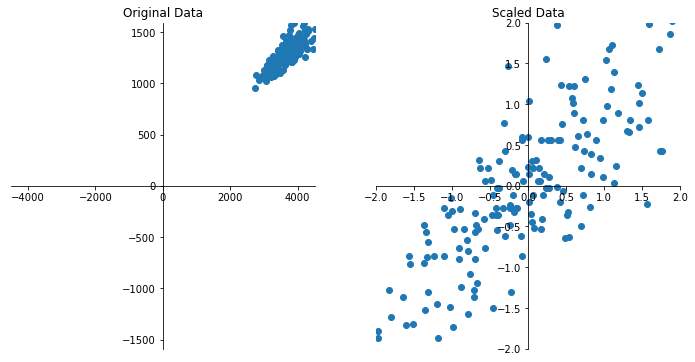

In [26]:
fig1 = plt.figure(figsize=(12,6))
axes1 = fig1.add_subplot(1,2,1)
axes2 = fig1.add_subplot(1,2,2)

axes1.set_title('Original Data')
axes2.set_title('Scaled Data')

maxx = X_train['size'].max()
maxy = y_train.max()

axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train['size'], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled)

plt.show()

## Putting it all together

#### 1. convert categorical data to numbers using Interger or Binary Encoding

In [28]:
X = pd.get_dummies(iq[['size','gender','age']])
y = iq['weight'].values.reshape(-1,1)
X.head()

,size,gender_Female,gender_Male,age_20-46,age_46+
0,4512,0,1,1,0
1,3738,0,1,1,0
2,4261,0,1,1,0
3,3777,0,1,1,0
4,4177,0,1,1,0


#### 2. split data into training and testing data

In [30]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=42)

#### 3. Scale or Normalize your data. Use StandardScalar if you don't know anything about your data.

In [32]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
y_train_scaled = y_scaler.transform(y_train)

X_test_scaled = X_scaler.transform(X_test)
y_test_scaled = y_scaler.transform(y_test)

#### 4. fit the model to the scaled training data and make predictions using the scaled test data

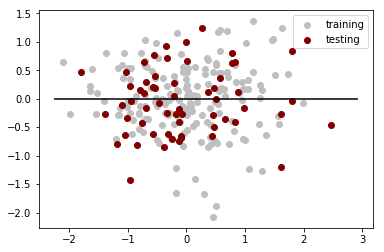

In [48]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()

model.fit(X_train_scaled, y_train_scaled)

plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled)-y_train_scaled,
            c='0.75',label='training')

plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled)-y_test_scaled,
            c='maroon', label='testing')


plt.legend()
plt.hlines(y=0,xmin=y_test_scaled.min(),xmax=y_test_scaled.max())




#### 5. Quantifying your model using the scaled data

In [45]:
from sklearn.metrics import mean_squared_error, r2_score

prediction = model.predict(X_test_scaled)

mse_test = mean_squared_error(y_test_scaled, prediction)
r2_score = r2_score(y_test_scaled, prediction)

print('mean squared error', mse_test)
print('r2_score', r2_score)


mean squared error 0.3230551580991293
r2_score 0.6804912531419807


---

## Alternate Preprocessing Methods

In [50]:
brain = pd.read_csv('Resources/brain_categorical.csv')
brain.head()

X = brain[["gender", "age", "size"]]
y = brain["weight"].values.reshape(-1, 1)
print(X.shape, y.shape)

(237, 3) (237, 1)


## Label Encoding
Label Encoding simply encodes each category as an integer value. Sklearn provides a preprocessing library to assist with this.

- beware that some models are sensitive to Integer Encoding!
- distance equations in clustering algorithms are particularly sensitive.


In [51]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()

data = X.copy()

label_encoder.fit(data['gender'])
label_encoder.classes_


array(['Female', 'Male'], dtype=object)

In [52]:
label_encoder.transform(data.gender)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## MinMaxScaler

In [53]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,size,gender_Female,gender_Male,age_20-46,age_46+
125,3782,0,1,0,1
119,3937,0,1,0,1
66,3415,0,1,0,1
216,3246,1,0,0,1
67,3372,0,1,0,1


In [54]:
from sklearn.preprocessing import MinMaxScaler

X_minmax = MinMaxScaler().fit(X_train)
y_minmax = MinMaxScaler().fit(y_train)

X_train_minmax = X_minmax.transform(X_train)
X_test_minmax = X_minmax.transform(X_test)
y_train_minmax = y_minmax.transform(y_train)
y_test_minmax = y_minmax.transform(y_test)

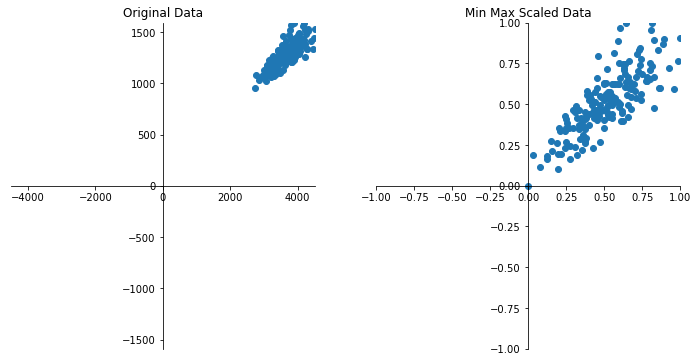

In [55]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Min Max Scaled Data")

maxx = X_train["size"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-1, 1)
axes2.set_ylim(-1, 1)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["size"], y_train)
axes2.scatter(X_train_minmax[:,0], y_train_minmax[:])

In [57]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()

model.fit(X_train_minmax, y_train_minmax)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [58]:
from sklearn.metrics import mean_squared_error, r2_score

prediction = model.predict(X_test_minmax)

mse_test = mean_squared_error(y_test_minmax, prediction)
r2_score = r2_score(y_test_minmax, prediction)

print('mean squared error', mse_test)
print('r2_score', r2_score)

mean squared error 0.011520357233998933
r2_score 0.6804912531419809


## Childhood Respiratory Disease - Student

In [1]:
import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
smoke = pd.read_csv('Resources/smoking.csv')
smoke.head()

,Id,Age,FEV,Height,Sex,Smoker
0,301,9,1.708,57.0,Female,Non
1,451,8,1.724,67.5,Female,Non
2,501,7,1.720,54.5,Female,Non
3,642,9,1.558,53.0,Male,Non
4,901,9,1.895,57.0,Male,Non


In [3]:
smoking = pd.get_dummies(smoke)
smoking.head()



,Id,Age,FEV,Height,Sex_Female,Sex_Male,Smoker_Current,Smoker_Non
0,301,9,1.708,57.0,1,0,0,1
1,451,8,1.724,67.5,1,0,0,1
2,501,7,1.720,54.5,1,0,0,1
3,642,9,1.558,53.0,0,1,0,1
4,901,9,1.895,57.0,0,1,0,1


In [4]:
X = smoking[['Id', 'Age', 'Height', 'Sex_Female', 'Sex_Male', 'Smoker_Current', 'Smoker_Non']]
y = smoking['FEV'].values.reshape(-1,1)

In [5]:
print(X.shape,y.shape)

(654, 7) (654, 1)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [8]:
X_train_scaler = X_scaler.transform(X_train)
y_train_scaler = y_scaler.transform(y_train)

X_test_scaler = X_scaler.transform(X_test)
y_test_scaler = y_scaler.transform(y_test)

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaler,y_train_scaler)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Text(0.5, 1.0, 'residual plot')

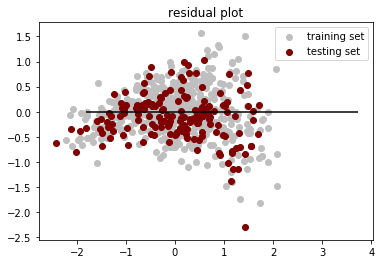

In [10]:
plt.scatter(model.predict(X_train_scaler), model.predict(X_train_scaler)-y_train_scaler,
           c='0.75', label='training set')

plt.scatter(model.predict(X_test_scaler), model.predict(X_test_scaler)-y_test_scaler,
           c='maroon', label='testing set')

plt.legend()
plt.hlines(y=0,xmin=y_test_scaler.min(),xmax=y_test_scaler.max())
plt.title('residual plot')

In [34]:
from sklearn.metrics import mean_squared_error, r2_score

prediction = model.predict(X_test_scaler)

mse_testing = mean_squared_error(y_test_scaler, prediction)
r2_score = r2_score(y_test_scaler, prediction)

print('mse',mse_testing)
print('r2',r2_score)

mse 0.22924305606043122
r2 0.79450773854979


In [35]:
model.score(X_test_scaler, y_test_scaler)

0.7945077385497898

### Lasso Model
- Note: Use an alpha of .01 when creating the model for this activity

In [36]:
from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha=.01).fit(X_train_scaler, y_train_scaler)

predictions = model_lasso.predict(X_test_scaler)


MSE = mean_squared_error(y_test_scaler, predictions)
r2 = lasso.score(X_test_scaler, y_test_scaler)

print(f'MSE: {MSE}, R2: {r2}')


MSE: 0.2307077283686019, R2: 0.7931948140492103


### Ridge Model
- Note: Use an alpha of 0.1 when creating the model for this activity

In [41]:
from sklearn.linear_model import Ridge

model_ridge = Ridge(alpha=0.1).fit(X_train_scaler, y_train_scaler)

predictions = model_ridge.predict(X_test_scaler)

MSE = mean_squared_error(y_test_scaler, predictions)
r2 = model_ridge.score(X_test_scaler, y_test_scaler)

print(f'MSE: {MSE}, R2: {r2}')

MSE: 0.22925001884460922, R2: 0.7945014971469258


### ElasticNet Model
- Note: Use an alpha of .01 when creating the model for this activity

In [46]:
from sklearn.linear_model import ElasticNet

model_elasticnet = ElasticNet(alpha=0.1).fit(X_train_scaler, y_train_scaler)

predictions = model_elasticnet.predict(X_test_scaler)

mse = mean_squared_error(y_test_scaler, predictions)
r2 = model_elasticnet.score(X_test_scaler, y_test_scaler)

print(f'MSE: {mse}, r2 {r2}')

MSE: 0.24611173904076705, r2 0.7793867404576946
